In [1]:
# ME17B58 - Assignment 9

# Assignment 9

## 1. SVM (Linearly Seperable Data)

### You are given a two dimensional dataset (SVM_Q1) with 4 classes and you have to use SVM for classification.

### Import the required libraries 

In [2]:
# Imports library
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### The code for loading data is given below.

In [3]:
# load data (do not change it)
X_train, X_test, y_train, y_test = np.load('./SVM_Q1.npy', allow_pickle=True)

In [4]:
print(X_train)

[[-1.36857766  1.75811615]
 [ 1.47993109  4.19546942]
 [-1.4735039   6.01227277]
 ...
 [ 3.4786441   5.63913185]
 [ 4.96997945  0.35415132]
 [ 4.81984578  0.54598082]]


In [5]:
print(y_train)

[0 1 1 ... 3 2 2]


### 1.a) Write code to visualize the training data

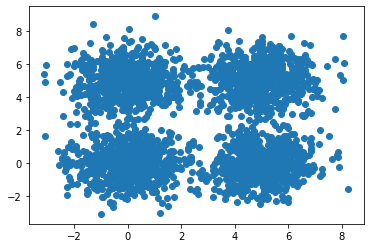

In [6]:
plt.scatter(X_train[:,0], X_train[:,1])

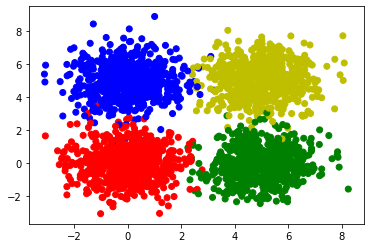

In [7]:
# Generate scatter plot for training data 
colors = ['r','b','g','y']
fig = matplotlib.figure
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

### 1.b) Write the code for SVM classifier (you can write code from scratch or use sklrean)

In [8]:
# Scaling the data
sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

In [9]:
svclassifier=SVC(kernel ='linear', gamma='scale')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_pred= svclassifier.predict(X_test)

### 1.c) Generate the confusion matrix for the classifer on the test data

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[327   4   5   0]
 [  3 324   0   1]
 [  3   0 336   1]
 [  0   1   1 314]]


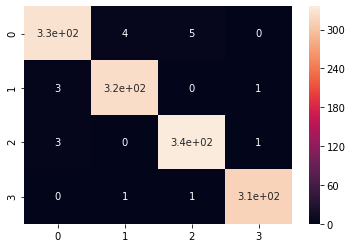

In [12]:
sns.heatmap(conf_matrix, annot=True)

### 1.d) Visualize the support vectors and decision boundary

In [13]:
# Support vector indices
support_vector_indices = svclassifier.support_
print(support_vector_indices)

[  93  190  273  302  396  432  497  503  546  552  809  825 1005 1130
 1165 1181 1182 1265 1318 1456 1481 1482 1483 1721 1767 1952 1971 2100
 2103 2388 2408 2435 2508 2634   62  129  144  232  344  357  516  670
  677  701  754  868  988 1008 1024 1226 1235 1271 1286 1526 1530 1646
 1666 1724 1920 1945 2094 2216 2240 2469 2499 2577   39  150  406  492
  504  556  806  820 1000 1164 1167 1187 1301 1380 1626 1675 1734 1768
 1844 1874 1910 2053 2078 2081 2342 2448 2605 2666 2667  445  479  530
  641  679  710  793  835  895  974 1064 1075 1127 1240 1272 1406 1434
 1497 1957 1985 2192 2299 2424 2434 2438 2516 2657]


In [14]:
# Number of support vectors per class
support_vectors_per_class = svclassifier.n_support_
print(support_vectors_per_class)

[34 32 29 27]


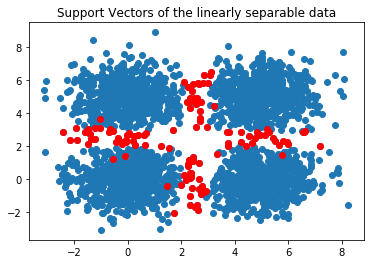

In [15]:
# Get support vectors & visualize them
support_vectors = svclassifier.support_vectors_

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support Vectors of the linearly separable data')
plt.show()

In [16]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

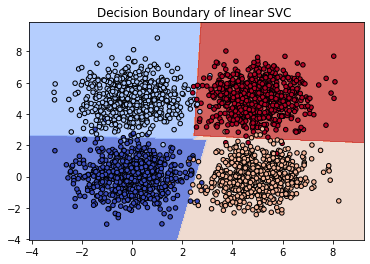

In [17]:
fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_title('Decision Boundary of linear SVC ')
plt.show()

### 1.e) Report the accuracy obtained 

In [18]:
# Code for Accuracy
accuracy_linear = accuracy_score(y_test, y_pred)
print("Accuracy for linear SVM: {}%".format(accuracy_linear*100))

Accuracy for linear SVM: 98.56060606060606%


## 2. SVM (Non-linearly separable Data)

### You are given a two dimensional dataset with 2 classes as loaded below and you have to use SVM for classification.

In [19]:
# generating data (do not change it)
from sklearn.datasets import make_circles 
X, Y = make_circles(n_samples = 3000, noise = 0.04) 

In [20]:
print(X)
print(Y)

[[ 9.77478848e-02 -8.72691273e-01]
 [-9.90419478e-01 -1.03822304e-01]
 [ 1.12064137e-01  9.64936005e-01]
 ...
 [-1.01094270e-03 -9.72733456e-01]
 [-4.73674523e-01 -6.14478554e-01]
 [-1.03383482e+00 -3.33356702e-01]]
[1 0 0 ... 0 1 0]


### 2.a) Use train_test_split function in sklearn to split the dataset into train and test sets in the ratio of 80:20

In [21]:
# Code here
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 2.b) Write the code for SVM classifier with polynomial kernel (you can write code from scratch or use sklrean)

Hint: Use kernel of degree 8.

In [22]:
svclassifier = SVC(kernel='poly', degree=8, gamma='scale')
svclassifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
Y_pred = svclassifier.predict(X_test)

### 2.c) Generate the confusion matrix for the classifer on the test data

In [24]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[304   1]
 [  1 294]]


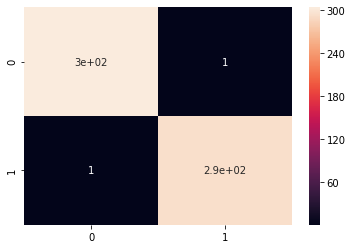

In [25]:
sns.heatmap(conf_matrix, annot=True)

### 2.d) Visualize the support vectors and plot the decision boundary

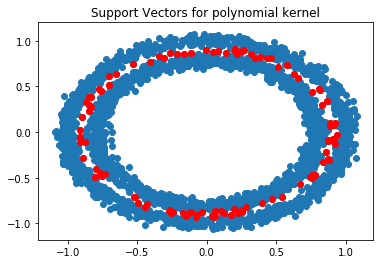

In [26]:
# Get support vectors & visualize them
support_vectors = svclassifier.support_vectors_

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support Vectors for polynomial kernel')
plt.show()

In [27]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

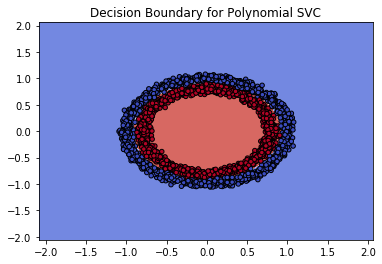

In [28]:
fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_title('Decision Boundary for Polynomial SVC')
plt.show()

### 2.e) Report the accuracy obtained 

In [29]:
# Accuracy code
accuracy_poly = accuracy_score(Y_test, Y_pred)
print("Polynomial Kernel Accuracy: {}%".format(accuracy_poly*100))

Polynomial Kernel Accuracy: 99.66666666666667%


### 2.f) Repeat the above steps with sigmoid kernel (you can write code from scratch or use sklearn). You can tune the parameter to obtain better accuracy on test set.

In [30]:
svclassifier = SVC(kernel='sigmoid', gamma='scale')
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)

In [31]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[172 133]
 [160 135]]


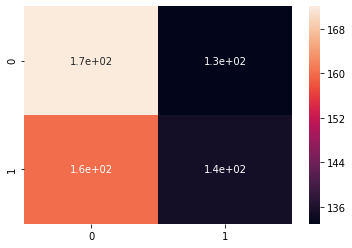

In [32]:
sns.heatmap(conf_matrix, annot=True)

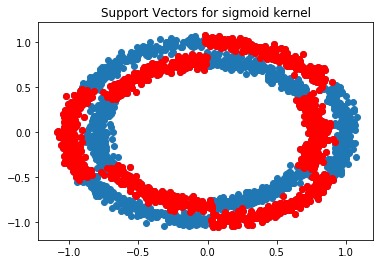

In [33]:
# Get support vectors & visualize them
support_vectors = svclassifier.support_vectors_

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support Vectors for sigmoid kernel')
plt.show()

In [34]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

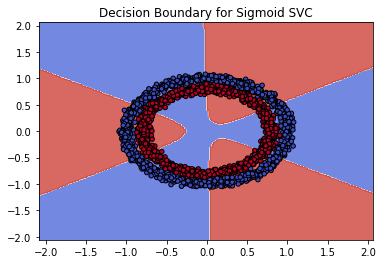

In [35]:
fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_title('Decision Boundary for Sigmoid SVC')
plt.show()

In [36]:
accuracy_sigmoid = accuracy_score(Y_test, Y_pred)
print("Sigmoid Kernel Accuracy: {}%".format(accuracy_sigmoid*100))

Sigmoid Kernel Accuracy: 51.16666666666667%


### 2.g) Reapeat the steps 2.c to 2.g with  radial basis function kernel (you can write code from scratch or use sklrean). You can tune the parameter to obtain better accuracy on test set.

In [37]:
svclassifier = SVC(kernel='rbf', gamma='scale')
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)

[[305   0]
 [  1 294]]


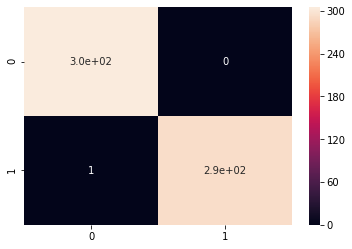

In [38]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)

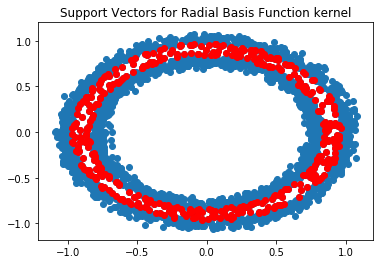

In [39]:
# Get support vectors & visualize them
support_vectors = svclassifier.support_vectors_

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support Vectors for Radial Basis Function kernel')
plt.show()

In [40]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

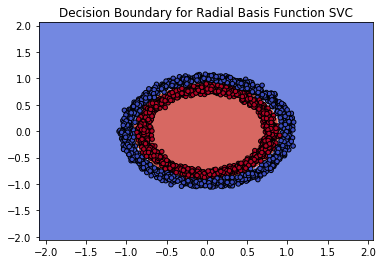

In [41]:
fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_title('Decision Boundary for Radial Basis Function SVC')
plt.show()

In [42]:
accuracy_rbf = accuracy_score(Y_test, Y_pred)
print("Radial Basis Function Kernel Accuracy: {}%".format(accuracy_rbf*100))

Radial Basis Function Kernel Accuracy: 99.83333333333333%


### 2.h) For which kernal in SVM, you have obtained the highest and lowest  accuracy? What do you think the reason for it? 

Both Radial Basis Function, and polynomial function perform rather well with an accuracy of over 99%. The polynomial function gives a slightly lower accuracy than the rbf kernel.

The sigmoid function has a comparitively poorer accuracy of 50%.

The reason is seen in the decision boundary. Sigmoidal function works well for data which can be divided into separate regions, and does not work for an enclosed region like a circle, as is the case here.

An 8-degree polynomial function, as well as the rbf function can represent this. Hence leading to the above results